In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [3]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
# Load the dataframe
data = pd.read_csv('Preprocessed_data_1.csv')

# Create a copy of the dataframe
pre_df = data.copy()

# Handling missing values in the 'text' column
pre_df['text'] = pre_df['text'].fillna('')

# Drop rows with empty strings in the 'text' column
pre_df = pre_df[pre_df['text'] != '']

# Reset the index of the DataFrame
pre_df.reset_index(drop=True, inplace=True)

In [4]:
pre_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55876 entries, 0 to 55875
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       55876 non-null  int64 
 1   text             55876 non-null  object
 2   original_text    55876 non-null  object
 3   listed_emotions  55876 non-null  object
 4   emotion_count    55876 non-null  int64 
 5   labels           55876 non-null  object
 6   encoded_labels   55876 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.0+ MB


In [5]:
# Tokenization
tokenizer = Tokenizer()
texts = pre_df['text']
tokenizer.fit_on_texts(texts)  # 'texts' represents the text data
num_words = len(tokenizer.word_index) + 1  # Add 1 for the reserved 0 index
embedding_dim = 100
sequence_lengths = [len(tokens) for tokens in tokenizer.texts_to_sequences(texts)]
max_sequence_length = max(sequence_lengths)
num_classes = len(set(pre_df['labels']))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [43]:
# Vectorization
vectorizer = TfidfVectorizer()
text_vectorized = vectorizer.fit_transform(pre_df['text'].values.astype('U'))
svd = TruncatedSVD(n_components=100)
text_vectorized_svd = svd.fit_transform(text_vectorized)
vectorized_df = pd.DataFrame(text_vectorized_svd)
pre_df_vectorized = pd.concat([pre_df, vectorized_df], axis=1)

In [8]:
# Split the data
X = text_vectorized_svd
y = pre_df['encoded_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [10]:
# One-hot encode the target variable
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

In [11]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, input_shape=(1, X_train.shape[2])))
model.add(Dense(units=num_classes, activation='softmax'))

c:\Users\pbans\OneDrive\Desktop\CD2\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:

# Train the model
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded),
          callbacks=[early_stopping])

Epoch 1/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4454 - loss: 1.0490 - val_accuracy: 0.4919 - val_loss: 0.9746
Epoch 2/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4767 - loss: 0.9898 - val_accuracy: 0.4896 - val_loss: 0.9675
Epoch 3/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4788 - loss: 0.9888 - val_accuracy: 0.4955 - val_loss: 0.9645
Epoch 4/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4806 - loss: 0.9879 - val_accuracy: 0.4972 - val_loss: 0.9645
Epoch 5/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4797 - loss: 0.9850 - val_accuracy: 0.4989 - val_loss: 0.9642
Epoch 6/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4906 - loss: 0.9838 - val_accuracy: 0.4950 - val_loss: 0.9642
Epoch 7/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4810 - loss: 0.9857 - val_accuracy: 0.4945 - val_loss: 0.9637
Epoch 8/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4846 - loss: 0.9825 - 

In [14]:
y_pred = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.51      0.28      0.36      6244
           1       0.39      0.17      0.24      6100
           2       0.51      0.83      0.64     10007

    accuracy                           0.50     22351
   macro avg       0.47      0.43      0.41     22351
weighted avg       0.48      0.50      0.45     22351



## Fine Tuning the model


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the model architecture with improvements
model = Sequential()

# Bidirectional LSTM with Dropout and Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second LSTM layer for feature extraction
model.add(Bidirectional(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,  # Larger batch size can stabilize training
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels))


Epoch 1/40


c:\Users\pbans\OneDrive\Desktop\CD2\.conda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4538 - loss: 1.0286 - val_accuracy: 0.5069 - val_loss: 1.0118 - learning_rate: 0.0010
Epoch 2/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4899 - loss: 0.9887 - val_accuracy: 0.5134 - val_loss: 0.9686 - learning_rate: 0.0010
Epoch 3/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4943 - loss: 0.9805 - val_accuracy: 0.5198 - val_loss: 0.9613 - learning_rate: 0.0010
Epoch 4/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4974 - loss: 0.9824 - val_accuracy: 0.5103 - val_loss: 0.9612 - learning_rate: 0.0010
Epoch 5/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4938 - loss: 0.9837 - val_accuracy: 0.5187 - val_loss: 0.9554 - learning_rate: 0.0010
Epoch 6/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5002 - loss: 0.9784 - val_accuracy: 0.5187 - val_loss: 0.9571 - learning_rate: 0.0010
Epoch 7/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4953 - loss: 0.9814 - val_accurac

In [62]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_21                │ (None, 1, 256)         │       234,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_22                │ (None, 128)            │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,223,947 (4.67 MB)

 Trainable params: 407,811 (1.56 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 815,624 (3.11 MB)

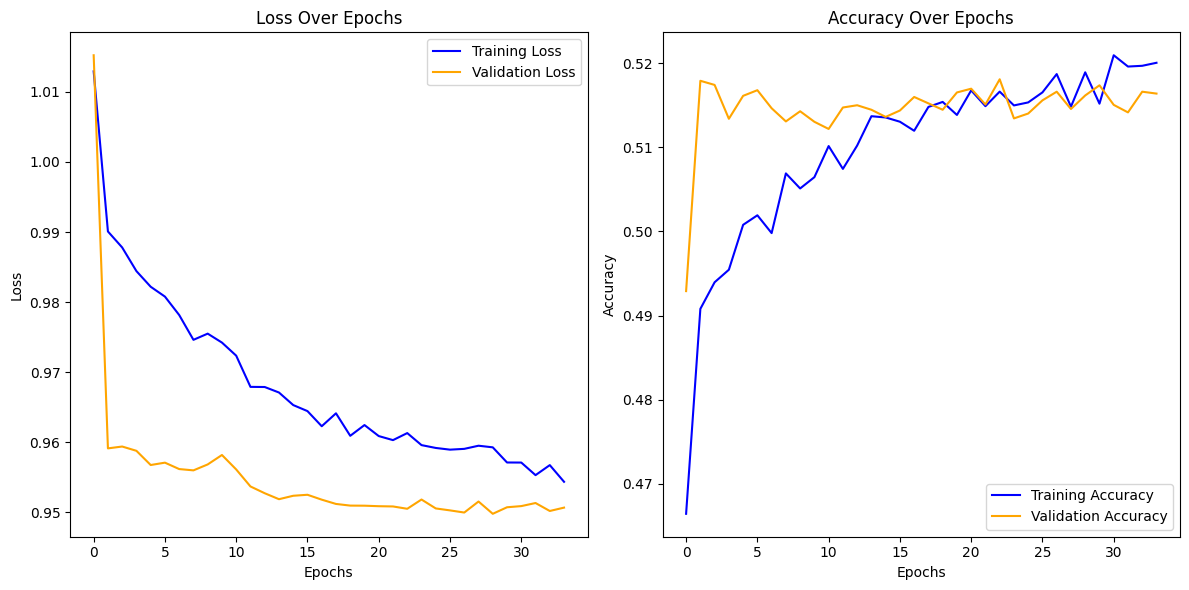

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM + GRU model
model1 = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model1.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(BatchNormalization())

# Second GRU layer
model1.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model1.add(Dropout(0.5))

# Fully connected dense layer
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.5))

# Output layer with softmax activation
model1.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model1.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model1.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


Epoch 1/30


c:\Users\pbans\OneDrive\Desktop\CD2\.conda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4314 - loss: 1.0426 - val_accuracy: 0.4698 - val_loss: 1.0273 - learning_rate: 0.0010
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4806 - loss: 0.9984 - val_accuracy: 0.5137 - val_loss: 0.9673 - learning_rate: 0.0010
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4856 - loss: 0.9941 - val_accuracy: 0.5120 - val_loss: 0.9607 - learning_rate: 0.0010
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4925 - loss: 0.9886 - val_accuracy: 0.5120 - val_loss: 0.9649 - learning_rate: 0.0010
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4971 - loss: 0.9778 - val_accuracy: 0.5149 - val_loss: 0.9604 - learning_rate: 0.0010
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4929 - loss: 0.9855 - val_accuracy: 0.5124 - val_loss: 0.9612 - learning_rate: 0.0010
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5021 - loss: 0.9796 - val_accurac

In [48]:
model1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_17                │ (None, 1, 256)         │       234,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ (None, 128)            │       123,648 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,835 (4.20 MB)

 Trainable params: 367,107 (1.40 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 734,216 (2.80 MB)

Epoch 1/40


c:\Users\pbans\OneDrive\Desktop\CD2\.conda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4516 - loss: 1.0484 - val_accuracy: 0.4943 - val_loss: 0.9717 - learning_rate: 0.0010
Epoch 2/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4867 - loss: 0.9931 - val_accuracy: 0.4951 - val_loss: 0.9616 - learning_rate: 0.0010
Epoch 3/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4924 - loss: 0.9855 - val_accuracy: 0.5096 - val_loss: 0.9638 - learning_rate: 0.0010
Epoch 4/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4878 - loss: 0.9854 - val_accuracy: 0.5087 - val_loss: 0.9615 - learning_rate: 0.0010
Epoch 5/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4879 - loss: 0.9851 - val_accuracy: 0.5151 - val_loss: 0.9599 - learning_rate: 0.0010
Epoch 6/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4971 - loss: 0.9820 - val_accuracy: 0.5116 - val_loss: 0.9589 - learning_rate: 0.0010
Epoch 7/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5029 - loss: 0.9728 - val_accurac

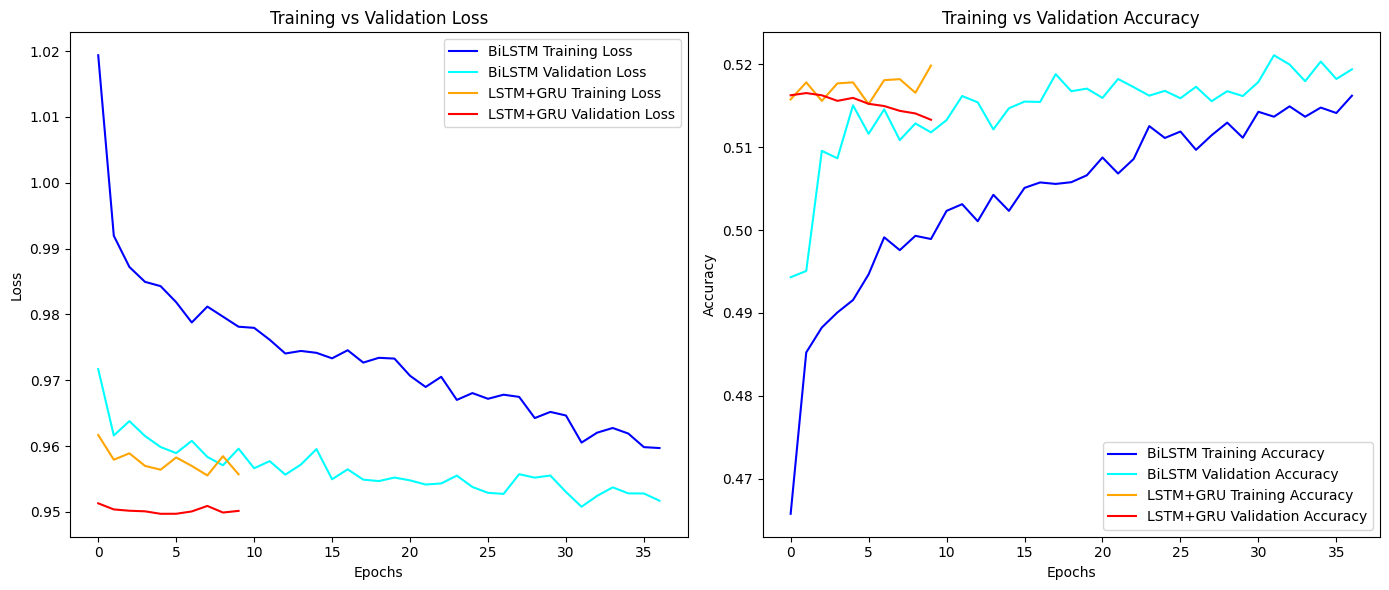

In [24]:
import matplotlib.pyplot as plt

# Define the Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Bidirectional(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3)))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(units=64, activation='relu'))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(units=num_classes, activation='softmax'))

bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train Bidirectional LSTM model
history_bilstm = bilstm_model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Train LSTM + GRU model (defined in the previous cell)
history_lstm_gru = model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Plot comparison of loss and accuracy
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss', color='blue')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss', color='cyan')
plt.plot(history_lstm_gru.history['loss'], label='LSTM+GRU Training Loss', color='orange')
plt.plot(history_lstm_gru.history['val_loss'], label='LSTM+GRU Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM Training Accuracy', color='blue')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Validation Accuracy', color='cyan')
plt.plot(history_lstm_gru.history['accuracy'], label='LSTM+GRU Training Accuracy', color='orange')
plt.plot(history_lstm_gru.history['val_accuracy'], label='LSTM+GRU Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Updated max_length based on the training sequence length
max_length = 100  # Assuming the model was trained with 100-length sequences

# Define a function to preprocess and predict sentiment for a given model
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Predict using the specified model
    prediction = model.predict(text_padded)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label




Epoch 1/30


c:\Users\pbans\OneDrive\Desktop\CD2\.conda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4418 - loss: 1.0394 - val_accuracy: 0.4738 - val_loss: 1.0139 - learning_rate: 0.0010
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4825 - loss: 0.9957 - val_accuracy: 0.5124 - val_loss: 0.9605 - learning_rate: 0.0010
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4929 - loss: 0.9866 - val_accuracy: 0.5138 - val_loss: 0.9632 - learning_rate: 0.0010
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4922 - loss: 0.9878 - val_accuracy: 0.5121 - val_loss: 0.9611 - learning_rate: 0.0010
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4995 - loss: 0.9799 - val_accuracy: 0.5064 - val_loss: 0.9585 - learning_rate: 0.0010
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4972 - loss: 0.9810 - val_accuracy: 0.5101 - val_loss: 0.9574 - learning_rate: 0.0010
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4994 - loss: 0.9777 - val_accurac

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training labels (before training the model)
label_encoder.fit(y_train)  # Use the raw labels, not the encoded ones

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Updated max_length based on the training sequence length
max_length = 100  # Assuming the model was trained with 100-length sequences

# Define a function to preprocess and predict sentiment for a given model
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Reshape the input to match the expected shape for the model
    text_padded = np.reshape(text_padded, (text_padded.shape[0], 1, text_padded.shape[1]))  # Shape: (1, 1, 100)
    
    # Predict using the specified model
    prediction = model.predict(text_padded)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label


Epoch 1/30


c:\Users\pbans\OneDrive\Desktop\CD2\.conda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1048/1048 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4580 - loss: 1.0304 - val_accuracy: 0.5020 - val_loss: 0.9759 - learning_rate: 0.0010
Epoch 2/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4844 - loss: 0.9931 - val_accuracy: 0.5062 - val_loss: 0.9630 - learning_rate: 0.0010
Epoch 3/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4895 - loss: 0.9918 - val_accuracy: 0.5141 - val_loss: 0.9621 - learning_rate: 0.0010
Epoch 4/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4970 - loss: 0.9842 - val_accuracy: 0.5136 - val_loss: 0.9591 - learning_rate: 0.0010
Epoch 5/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4954 - loss: 0.9830 - val_accuracy: 0.5080 - val_loss: 0.9604 - learning_rate: 0.0010
Epoch 6/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4940 - loss: 0.9858 - val_accuracy: 0.5145 - val_loss: 0.9595 - learning_rate: 0.0010
Epoch 7/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4972 - loss: 0.9838

699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.49      0.31      0.38      6244
           1       0.38      0.58      0.46      6100
           2       0.65      0.60      0.62     10007

    accuracy                           0.51     22351
   macro avg       0.51      0.49      0.49     22351
weighted avg       0.53      0.51      0.51     22351



In [40]:
model.save('sentiment_model_1.h5')

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [57]:
def predict_sentiment(model1, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    import numpy as np
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Reshape the padded input to add the third dimension (features = 1)
    text_reshaped = np.expand_dims(text_padded, axis=-1)  # Add 3rd dimension
    
    # Predict using the specified model
    prediction = model1.predict(text_reshaped)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label


699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


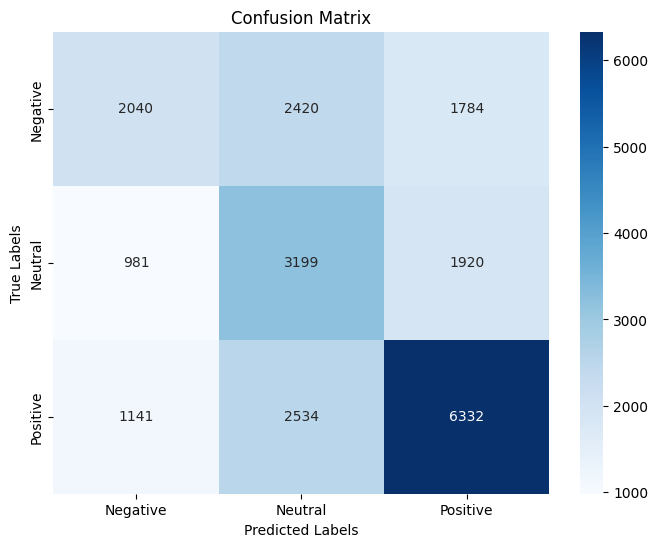

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the predicted class labels from the model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Get the true class labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
